In [43]:
import pickle

def load_pickle_file(filepath):
    try:
        with open(filepath, 'rb') as fi:
            return pickle.load(fi)
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return None

ow_binary = load_pickle_file("datasets/ow_binary.pkl")
ow_multi = load_pickle_file("datasets/ow_multi.pkl")
cw_multi = load_pickle_file("datasets/cw_multi.pkl")
ow_binary_tuned = load_pickle_file("datasets/ow_binary_tuned.pkl")
ow_multi_tuned = load_pickle_file("datasets/ow_multi_tuned.pkl")
cw_multi_tuned = load_pickle_file("datasets/cw_multi_tuned.pkl")

reports = [ow_binary, ow_multi, cw_multi, ow_binary_tuned, ow_multi_tuned, cw_multi_tuned]
titles = ["Open World Binary Class", "Open World Multi Class", "Closed World Multi Class", "Open World Binary Class Tuned", "Open World Multi Class Tuned", "Closed World Multi Class Tuned"]

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc

Heatmaps

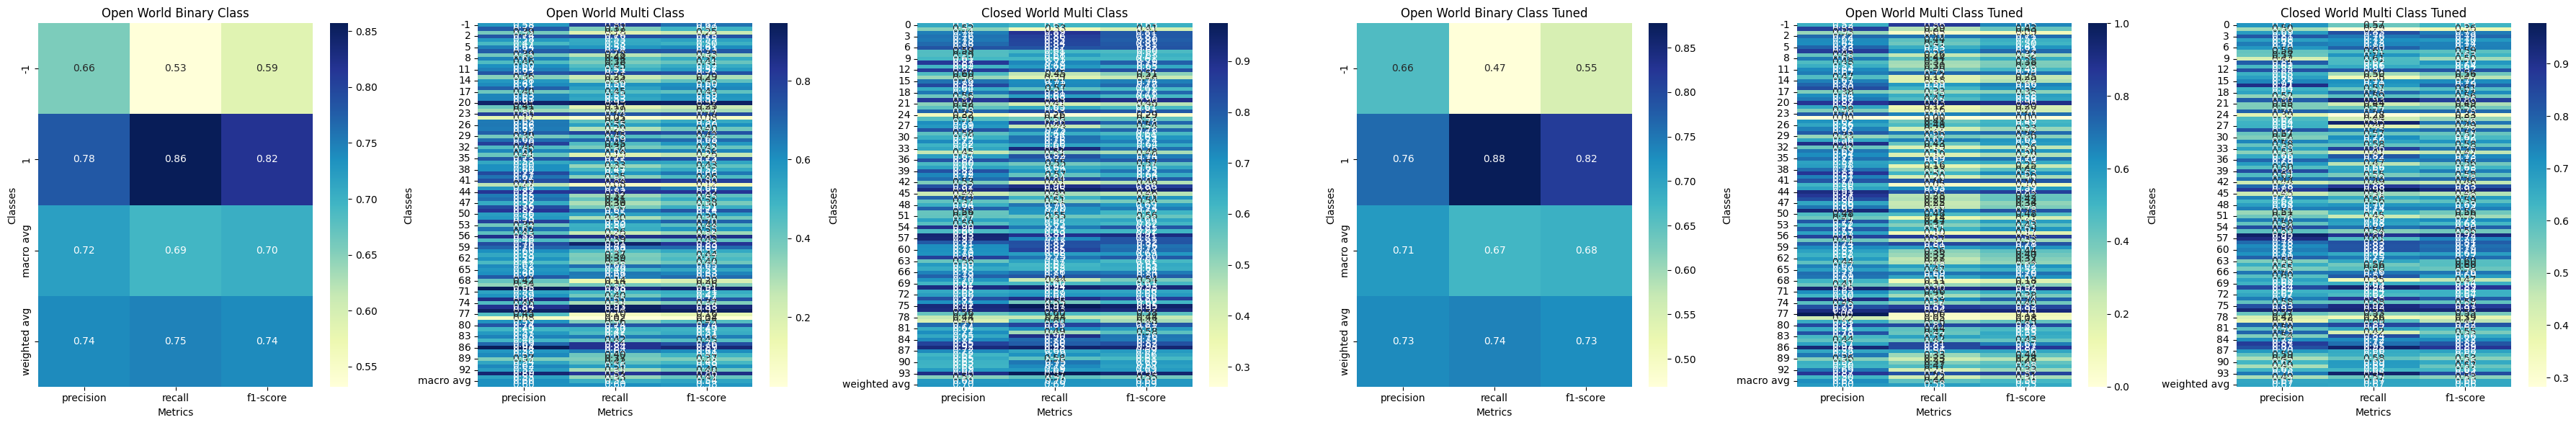

In [28]:

# Create a list to store the classification report metrics
metrics_reports = []

for report in reports:
    # Extract the classification report (it's stored in 'classification_report')
    classification_report_dict = report['classification_report']
    
    # Convert the classification report dictionary into a DataFrame
    df = pd.DataFrame(classification_report_dict).T  # Transpose to make classes as rows
    df = df.drop('support', axis=1)  # Drop the 'support' column
    df = df.drop('accuracy', axis=0, errors='ignore')  # Drop the 'accuracy' row
    
    metrics_reports.append(df)

# Plot the heatmaps
fig, axes = plt.subplots(1, len(reports), figsize=(6 * len(reports), 6))

if len(reports) == 1:
    axes = [axes]

for report_df, title, ax in zip(metrics_reports, titles, axes):
    sns.heatmap(report_df, annot=True, cmap="YlGnBu", ax=ax, fmt='.2f')
    ax.set_title(title)
    ax.set_ylabel('Classes')
    ax.set_xlabel('Metrics')

plt.tight_layout()
plt.savefig("datasets/confusion_matrix.png", dpi=300)  # Save the figure as a PNG file
plt.show()

Processing Open World Binary Class


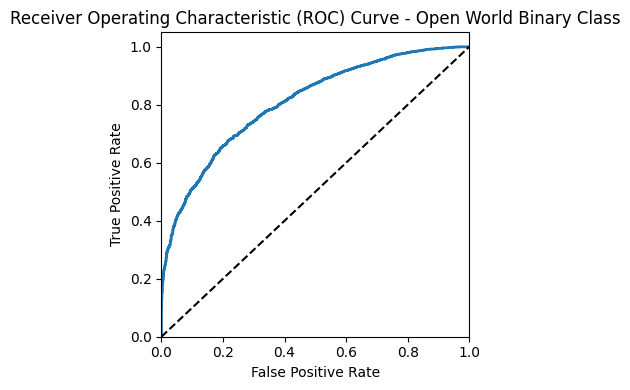

Processing Open World Multi Class


C:\Users\skei8\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


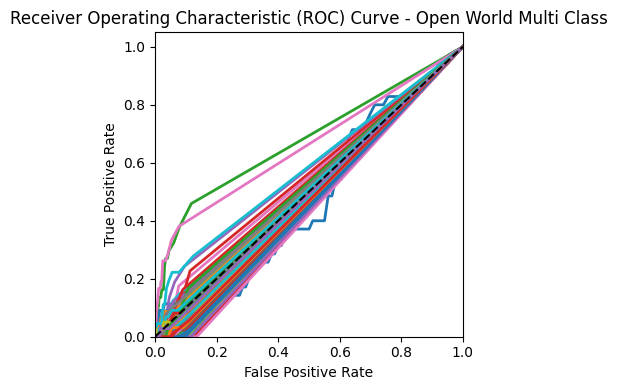

Processing Closed World Multi Class


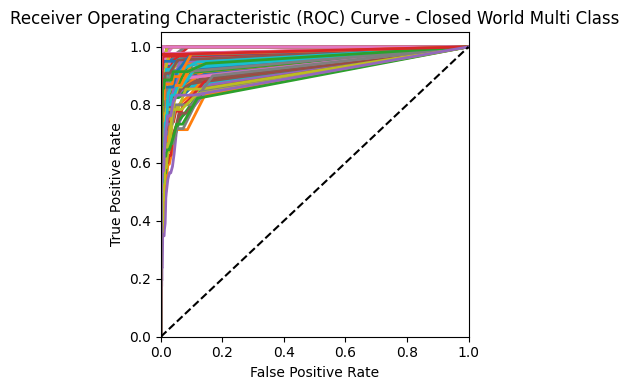

Processing Open World Binary Class Tuned


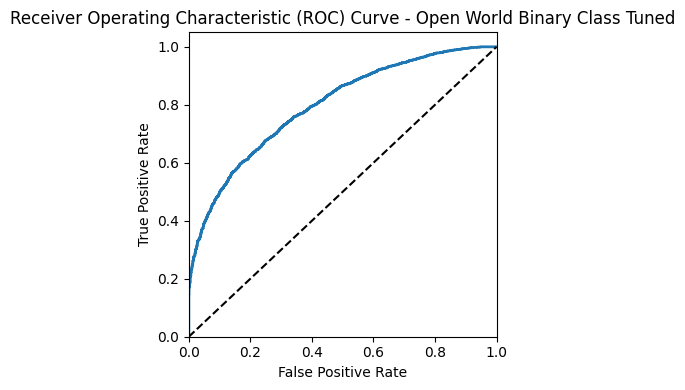

Processing Open World Multi Class Tuned


C:\Users\skei8\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


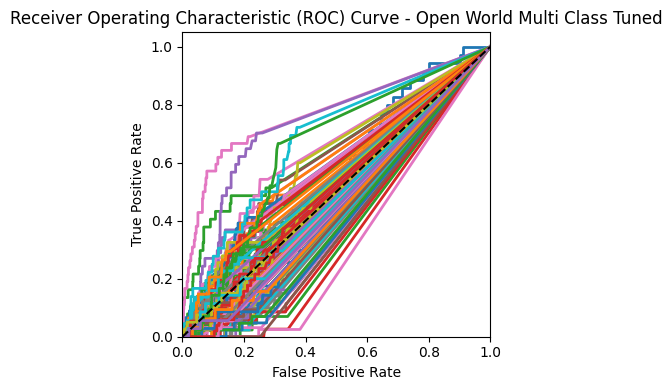

Processing Closed World Multi Class Tuned


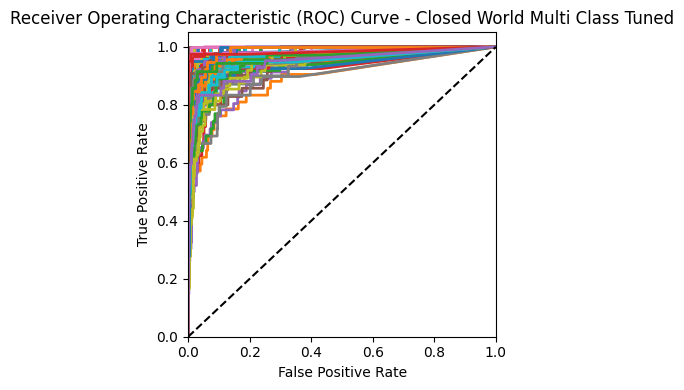

In [46]:
def plot_roc_curve_for_report(report, title):
    plt.figure(figsize=(4, 4))

    # Extract the data from the report
    y_test = report['y_test']  # True labels
    y_test_prob = report['y_test_prob']  # Predicted probabilities

    # Handle multi-class classification
    if y_test_prob.shape[1] > 2:  # Multi-class classification
        n_classes = y_test_prob.shape[1]
        for i in range(n_classes):
            # Compute ROC curve for each class (one-vs-rest)
            fpr, tpr, _ = roc_curve(y_test == i, y_test_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{title} Class {i} (AUC = {roc_auc:.2f})')
    else:  # Binary classification (2 classes)
        # Ensure y_test_prob has two columns (binary case)
        fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])  # Probability for positive class
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

    # Add random guess line
    plt.plot([0, 1], [0, 1], 'k--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {title}')
    # plt.legend(loc='lower right')
    plt.tight_layout()

    # Save or show the plot for this report
    plt.savefig(f"datasets/ROC_{title.replace(' ', '_')}.png")  # Save the plot with the title in the filename
    plt.show()

# Loop over each report and plot ROC curve separately
def plot_roc_curves_for_all_reports(reports, titles):
    for report, title in zip(reports, titles):
        print(f"Processing {title}")
        plot_roc_curve_for_report(report, title)

# Call the function to plot the ROC curves for all reports
plot_roc_curves_for_all_reports(reports, titles)